In [1]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler,  normalize
from sklearn.cluster import KMeans
import numpy as np
import seaborn as sns
import warnings
import matplotlib.pyplot as plt
import plotly.graph_objects as go
import plotly.express as px
import plotly.graph_objects as go
from plotly.offline import iplot
import warnings

In [2]:
df = pd.read_csv("C:\\Users\\tanis\\Data-Analysis-Visualisation\\WHR2023.csv")
df.head(10) # Display the first 10 rows of the dataset

,Country name,Ladder score,Standard error of ladder score,upperwhisker,lowerwhisker,Logged GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Ladder score in Dystopia,Explained by: Log GDP per capita,Explained by: Social support,Explained by: Healthy life expectancy,Explained by: Freedom to make life choices,Explained by: Generosity,Explained by: Perceptions of corruption,Dystopia + residual
0,Finland,7.804,0.036,7.875,7.733,10.792,0.969,71.150,0.961,-0.019,0.182,1.778,1.888,1.585,0.535,0.772,0.126,0.535,2.363
1,Denmark,7.586,0.041,7.667,7.506,10.962,0.954,71.250,0.934,0.134,0.196,1.778,1.949,1.548,0.537,0.734,0.208,0.525,2.084
2,Iceland,7.530,0.049,7.625,7.434,10.896,0.983,72.050,0.936,0.211,0.668,1.778,1.926,1.620,0.559,0.738,0.250,0.187,2.250
3,Israel,7.473,0.032,7.535,7.411,10.639,0.943,72.697,0.809,-0.023,0.708,1.778,1.833,1.521,0.577,0.569,0.124,0.158,2.691
4,Netherlands,7.403,0.029,7.460,7.346,10.942,0.930,71.550,0.887,0.213,0.379,1.778,1.942,1.488,0.545,0.672,0.251,0.394,2.110
5,Sweden,7.395,0.037,7.468,7.322,10.883,0.939,72.150,0.948,0.165,0.202,1.778,1.921,1.510,0.562,0.754,0.225,0.520,1.903
6,Norway,7.315,0.044,7.402,7.229,11.088,0.943,71.500,0.947,0.141,0.283,1.778,1.994,1.521,0.544,0.752,0.212,0.463,1.829
7,Switzerland,7.240,0.043,7.324,7.156,11.164,0.920,72.900,0.891,0.027,0.266,1.778,2.022,1.463,0.582,0.678,0.151,0.475,1.870
8,Luxembourg,7.228,0.069,7.363,7.093,11.660,0.879,71.675,0.915,0.024,0.345,1.778,2.200,1.357,0.549,0.710,0.149,0.418,1.845
9,New Zealand,7.123,0.038,7.198,7.048,10.662,0.952,70.350,0.887,0.175,0.271,1.778,1.842,1.544,0.513,0.672,0.230,0.471,1.852


In [3]:
# creating new data frame with only the columns we need
happy_df = df[['Country name','Ladder score','Logged GDP per capita','Social support','Healthy life expectancy','Freedom to make life choices','Generosity','Perceptions of corruption']].reset_index()
# renaming the columns
happy_df = happy_df.rename(columns={
    'index':'Rank',
    'Country name':'Country',
    'Ladder score': 'Score',
    'Logged GDP per capita': 'GDP per capita',
    'Healthy life expectancy': 'Life expectancy',
    'Freedom to make life choices': 'Freedom'
})
# adding 1 to the rank to start from 1
happy_df['Rank'] += 1
# displaying the first 5 rows of the new data frame
happy_df.head()

,Rank,Country,Score,GDP per capita,Social support,Life expectancy,Freedom,Generosity,Perceptions of corruption
0,1,Finland,7.804,10.792,0.969,71.150,0.961,-0.019,0.182
1,2,Denmark,7.586,10.962,0.954,71.250,0.934,0.134,0.196
2,3,Iceland,7.530,10.896,0.983,72.050,0.936,0.211,0.668
3,4,Israel,7.473,10.639,0.943,72.697,0.809,-0.023,0.708
4,5,Netherlands,7.403,10.942,0.930,71.550,0.887,0.213,0.379


In [4]:
happy_df[happy_df['Country']=='Malaysia']

,Rank,Country,Score,GDP per capita,Social support,Life expectancy,Freedom,Generosity,Perceptions of corruption
54,55,Malaysia,6.012,10.169,0.799,65.662,0.877,0.16,0.758


In [5]:
# Check the number of non-null values in the dataframe
happy_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137 entries, 0 to 136
Data columns (total 9 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Rank                       137 non-null    int64  
 1   Country                    137 non-null    object 
 2   Score                      137 non-null    float64
 3   GDP per capita             137 non-null    float64
 4   Social support             137 non-null    float64
 5   Life expectancy            136 non-null    float64
 6   Freedom                    137 non-null    float64
 7   Generosity                 137 non-null    float64
 8   Perceptions of corruption  137 non-null    float64
dtypes: float64(7), int64(1), object(1)
memory usage: 9.8+ KB


In [6]:
happy_df.describe()

,Rank,Score,GDP per capita,Social support,Life expectancy,Freedom,Generosity,Perceptions of corruption
count,137.000000,137.000000,137.000000,137.000000,136.000000,137.000000,137.000000,137.000000
mean,69.000000,5.539796,9.449796,0.799073,64.967632,0.787394,0.022431,0.725401
std,39.692569,1.139929,1.207302,0.129222,5.750390,0.112371,0.141707,0.176956
min,1.000000,1.859000,5.527000,0.341000,51.530000,0.382000,-0.254000,0.146000
25%,35.000000,4.724000,8.591000,0.722000,60.648500,0.724000,-0.074000,0.668000
50%,69.000000,5.684000,9.567000,0.827000,65.837500,0.801000,0.001000,0.774000
75%,103.000000,6.334000,10.540000,0.896000,69.412500,0.874000,0.117000,0.846000
max,137.000000,7.804000,11.660000,0.983000,77.280000,0.961000,0.531000,0.929000


In [7]:
happy_df.isnull().sum()

Rank                         0
Country                      0
Score                        0
GDP per capita               0
Social support               0
Life expectancy              1
Freedom                      0
Generosity                   0
Perceptions of corruption    0
dtype: int64

In [8]:
# found 1 null value in the data frame

# Check for missing values
happy_df[happy_df.isnull().any(axis=1)]

,Rank,Country,Score,GDP per capita,Social support,Life expectancy,Freedom,Generosity,Perceptions of corruption
98,99,State of Palestine,4.908,8.716,0.859,NaN,0.694,-0.132,0.836


In [9]:
# check the number of duplicated entries in the dataframe
happy_df.duplicated().sum()

# since there are no duplicates, no further action is required

0

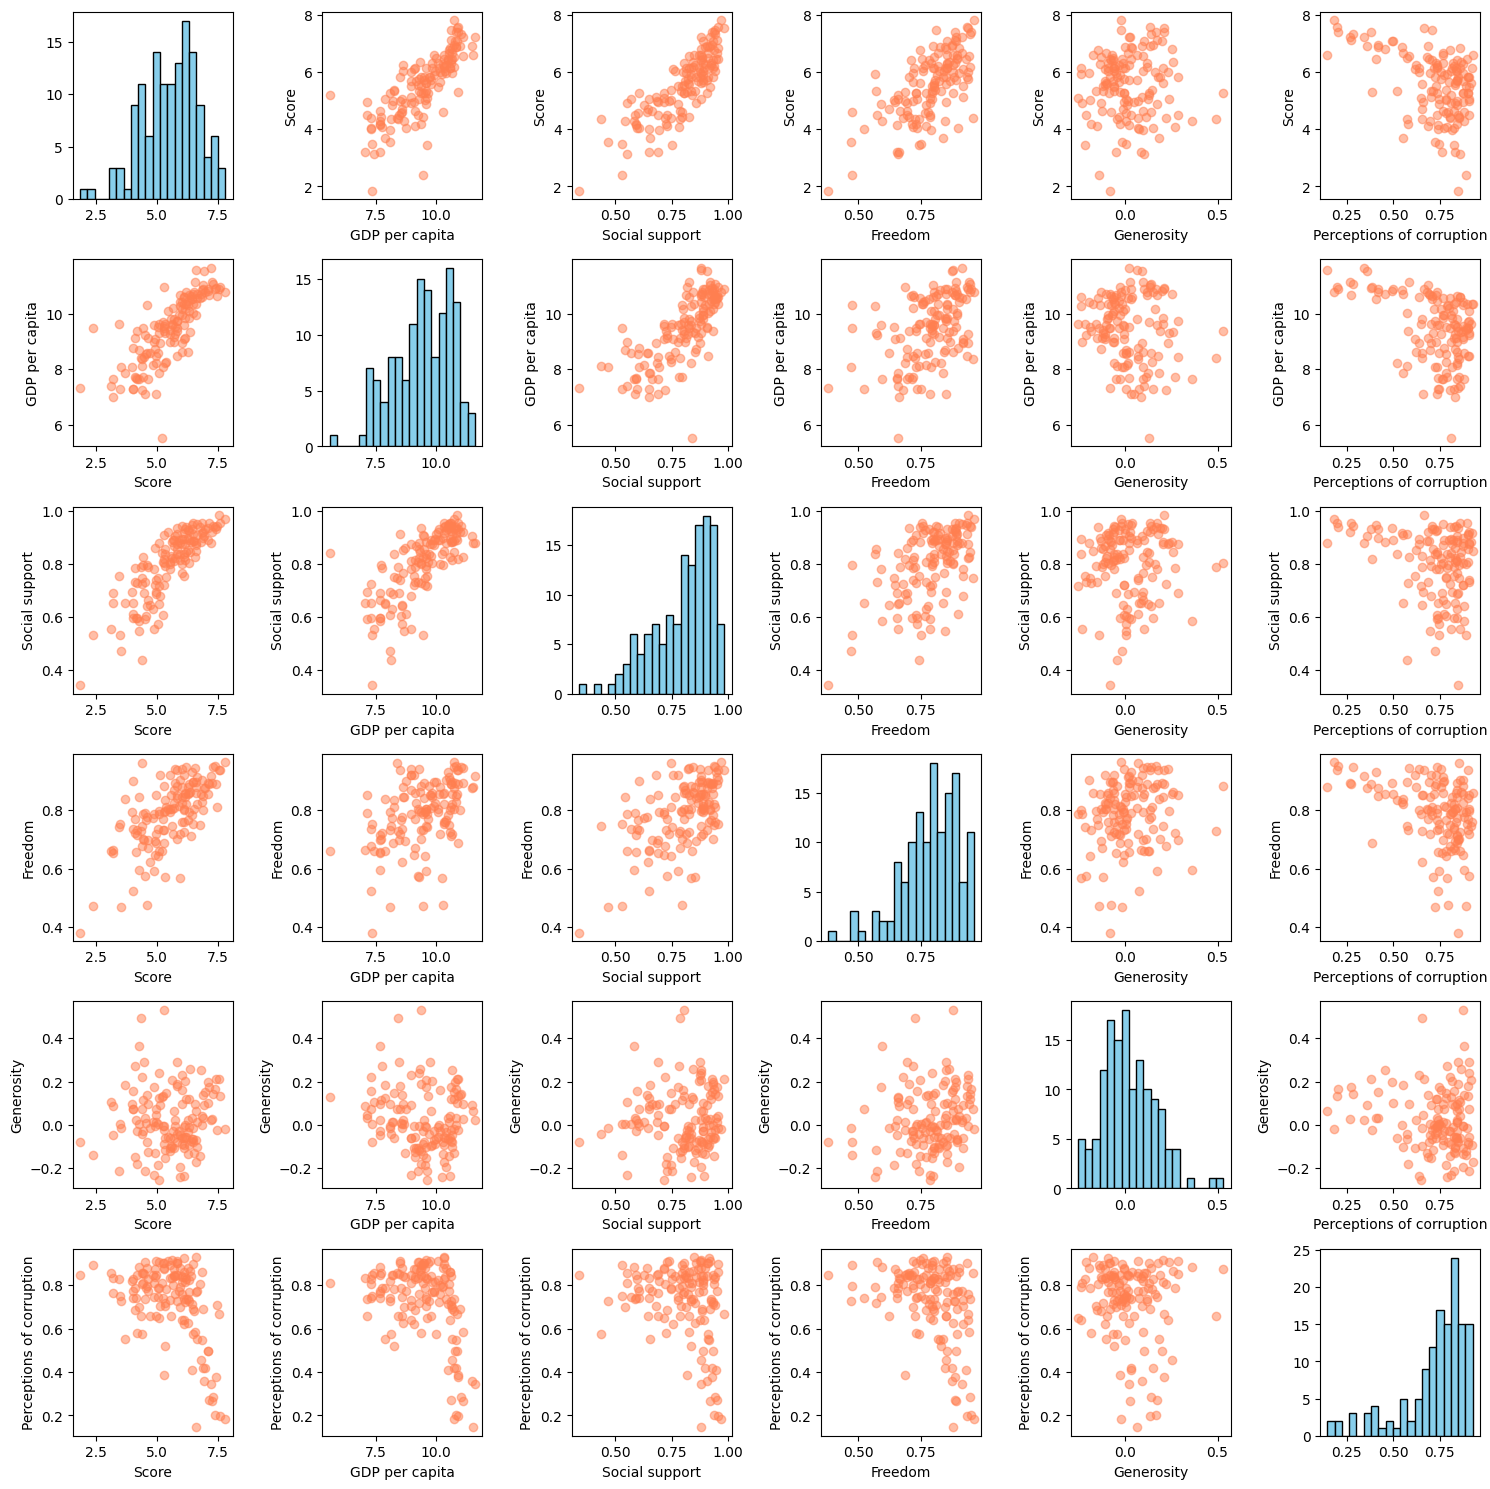

In [10]:
# Plot the pairplot
selected_columns = ['Score', 'GDP per capita', 'Social support', 'Freedom', 'Generosity', 'Perceptions of corruption']

# Plot individual scatter plots
fig, axes = plt.subplots(nrows=len(selected_columns), ncols=len(selected_columns), figsize=(15, 15))

for i, column1 in enumerate(selected_columns):
    for j, column2 in enumerate(selected_columns):
        if i == j:
            # Diagonal elements: Histograms
            axes[i, j].hist(happy_df[column1], bins=20, color='skyblue', edgecolor='black')
        else:
            # Scatter plots for off-diagonal elements
            axes[i, j].scatter(happy_df[column2], happy_df[column1], color='coral', alpha=0.5)
            axes[i, j].set_xlabel(column2)
            axes[i, j].set_ylabel(column1)

plt.tight_layout()
plt.show()
# Positive correlation between GDP and score 
# Positive correlation between Social Support and score 